<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/RL/agentchat_groupchat_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Chat with Coder and Visualization Critic

AutoGen offers conversable agents powered by LLM, tool or human, which can be used to perform tasks collectively via automated chat. This framework allows tool use and human participation through multi-agent conversation.
Please find documentation about this feature [here](https://microsoft.github.io/autogen/docs/Use-Cases/agent_chat).

````{=mdx}
:::info Requirements
Install `autogen-agentchat`:
```bash
pip install autogen-agentchat~=0.2
```

For more information, please refer to the [installation guide](/docs/installation/).
:::
````

## Set your API Endpoint

The [`config_list_from_json`](https://microsoft.github.io/autogen/docs/reference/oai/openai_utils#config_list_from_json) function loads a list of configurations from an environment variable or a json file.

In [2]:
!pip install autogen

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.0/352.0 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.9/313.9 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 51.3 MB/s eta 0:00:00


In [4]:
from google.colab import userdata
import openai
import os

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
openai.api_key  = os.environ["OPENAI_API_KEY"]

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import Image

import autogen

# config_list_gpt4 = autogen.config_list_from_json(
#     "OAI_CONFIG_LIST",
#     filter_dict={
#         "model": ["gpt-4", "gpt-4-0314", "gpt4", "gpt-4-32k", "gpt-4-32k-0314", "gpt-4-32k-v0314"],
#     },
# )

# import os

# config_list_gpt4 = {
#     "timeout": 600,
#     "cache_seed": 44,  # change the seed for different trials
#     "config_list":  [{"model": "gpt-4", "api_key": os.environ.get("OPENAI_API_KEY")}],
#     "temperature": 0,
# }

config_list_gpt4 = {
    "config_list":  [
        {
            "model": "gpt-4",
            "api_key": os.environ.get("OPENAI_API_KEY"),
            "timeout": 600,  # Moved timeout inside the config dictionary
            "cache_seed": 44,  # Moved cache_seed inside the config dictionary
            "temperature": 0  # Moved temperature inside the config dictionary
        }
    ],
}

````{=mdx}
:::tip
Learn more about configuring LLMs for agents [here](/docs/topics/llm_configuration).
:::
````

## Construct Agents

<div style="margin: 0 auto; width: 500px">
    <img src="https://github.com/microsoft/autogen/blob/0.2/notebook/viz_gc.png?raw=1" alt="Drawing"/>
  </div>

In [9]:
# llm_config = {"config_list": config_list_gpt4, "cache_seed": 42}

llm_config = {
    "config_list": config_list_gpt4["config_list"],  # Access the actual list of configs
    "cache_seed": 42
}
user_proxy = autogen.UserProxyAgent(
    name="User_proxy",
    system_message="A human admin.",
    code_execution_config={
        "last_n_messages": 3,
        "work_dir": "groupchat",
        "use_docker": False,
    },  # Please set use_docker=True if docker is available to run the generated code. Using docker is safer than running the generated code directly.
    human_input_mode="NEVER",
)
coder = autogen.AssistantAgent(
    name="Coder",  # the default assistant agent is capable of solving problems with code
    llm_config=llm_config,
)
critic = autogen.AssistantAgent(
    name="Critic",
    system_message="""Critic. You are a helpful assistant highly skilled in evaluating the quality of a given visualization code by providing a score from 1 (bad) - 10 (good) while providing clear rationale. YOU MUST CONSIDER VISUALIZATION BEST PRACTICES for each evaluation. Specifically, you can carefully evaluate the code across the following dimensions
- bugs (bugs):  are there bugs, logic errors, syntax error or typos? Are there any reasons why the code may fail to compile? How should it be fixed? If ANY bug exists, the bug score MUST be less than 5.
- Data transformation (transformation): Is the data transformed appropriately for the visualization type? E.g., is the dataset appropriated filtered, aggregated, or grouped  if needed? If a date field is used, is the date field first converted to a date object etc?
- Goal compliance (compliance): how well the code meets the specified visualization goals?
- Visualization type (type): CONSIDERING BEST PRACTICES, is the visualization type appropriate for the data and intent? Is there a visualization type that would be more effective in conveying insights? If a different visualization type is more appropriate, the score MUST BE LESS THAN 5.
- Data encoding (encoding): Is the data encoded appropriately for the visualization type?
- aesthetics (aesthetics): Are the aesthetics of the visualization appropriate for the visualization type and the data?

YOU MUST PROVIDE A SCORE for each of the above dimensions.
{bugs: 0, transformation: 0, compliance: 0, type: 0, encoding: 0, aesthetics: 0}
Do not suggest code.
Finally, based on the critique above, suggest a concrete list of actions that the coder should take to improve the code.
""",
    llm_config=llm_config,
)

groupchat = autogen.GroupChat(agents=[user_proxy, coder, critic], messages=[], max_round=20)
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=llm_config)

## Start Chat

In [10]:
user_proxy.initiate_chat(
    manager,
    message="download data from https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv and plot a visualization that tells us about the relationship between weight and horsepower. Save the plot to a file. Print the fields in a dataset before visualizing it.",
)
# type exit to terminate the chat

User_proxy (to chat_manager):

download data from https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv and plot a visualization that tells us about the relationship between weight and horsepower. Save the plot to a file. Print the fields in a dataset before visualizing it.

--------------------------------------------------------------------------------

Next speaker: Coder

Coder (to chat_manager):

Sure, we can use Python's pandas library to download and read the CSV file, and matplotlib to plot the data. Here is the Python code to do this:

```python
# filename: download_and_plot.py

import pandas as pd
import matplotlib.pyplot as plt

# Download and read the CSV file
url = "https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv"
data = pd.read_csv(url)

# Print the fields in the dataset
print("Fields in the dataset: ", data.columns.tolist())

# Plot the relationship between weight and horsepower
plt.scatter(data['Weight_in_lbs'], data['Horsepower'])
plt.

ChatResult(chat_id=None, chat_history=[{'content': 'download data from https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv and plot a visualization that tells us about the relationship between weight and horsepower. Save the plot to a file. Print the fields in a dataset before visualizing it.', 'role': 'assistant', 'name': 'User_proxy'}, {'content': 'Sure, we can use Python\'s pandas library to download and read the CSV file, and matplotlib to plot the data. Here is the Python code to do this:\n\n```python\n# filename: download_and_plot.py\n\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# Download and read the CSV file\nurl = "https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv"\ndata = pd.read_csv(url)\n\n# Print the fields in the dataset\nprint("Fields in the dataset: ", data.columns.tolist())\n\n# Plot the relationship between weight and horsepower\nplt.scatter(data[\'Weight_in_lbs\'], data[\'Horsepower\'])\nplt.xlabel(\'Weight (in lbs)\')\

## Display the saved figure

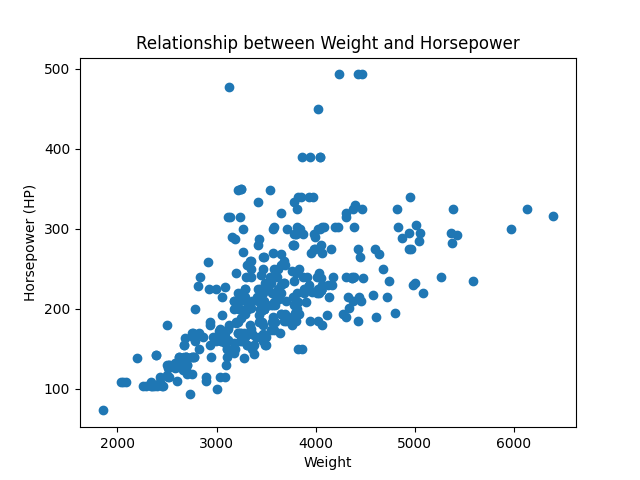

In [13]:
Image(filename="groupchat/weight_horsepower_plot.png")

## Example 2

In [14]:
user_proxy.reset()
coder.reset()
critic.reset()
groupchat = autogen.GroupChat(agents=[user_proxy, coder, critic], messages=[], max_round=20)
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=llm_config)
user_proxy.initiate_chat(
    manager,
    message="download data from https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv and show me a plot that tells me about the amount of each weather . Save the plot to a file. Print the fields in a dataset before visualizing it. Take the feedback from the critic to improve the code.",
)

User_proxy (to chat_manager):

download data from https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv and show me a plot that tells me about the amount of each weather . Save the plot to a file. Print the fields in a dataset before visualizing it. Take the feedback from the critic to improve the code.

--------------------------------------------------------------------------------

Next speaker: Coder

Coder (to chat_manager):

Sure, we can use Python's pandas library to download and read the CSV file, and matplotlib to plot the data. Here is the plan:

1. Download the CSV file using pandas' `read_csv` function.
2. Print the fields in the dataset.
3. Count the occurrences of each weather type.
4. Plot the data using matplotlib.
5. Save the plot to a file.

Let's start with the first three steps. We will download the data, print the fields, and count the occurrences of each weather type.

```python
# filename: download_and_plot.py

import pandas as pd

# Step

ChatResult(chat_id=None, chat_history=[{'content': 'download data from https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv and show me a plot that tells me about the amount of each weather . Save the plot to a file. Print the fields in a dataset before visualizing it. Take the feedback from the critic to improve the code.', 'role': 'assistant', 'name': 'User_proxy'}, {'content': 'Sure, we can use Python\'s pandas library to download and read the CSV file, and matplotlib to plot the data. Here is the plan:\n\n1. Download the CSV file using pandas\' `read_csv` function.\n2. Print the fields in the dataset.\n3. Count the occurrences of each weather type.\n4. Plot the data using matplotlib.\n5. Save the plot to a file.\n\nLet\'s start with the first three steps. We will download the data, print the fields, and count the occurrences of each weather type.\n\n```python\n# filename: download_and_plot.py\n\nimport pandas as pd\n\n# Step 1: Download the CSV file\nurl =

### The original chart before critic's suggestion

Fields in the dataset:
Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')
Plot has been saved to 'weather_plot.png'.


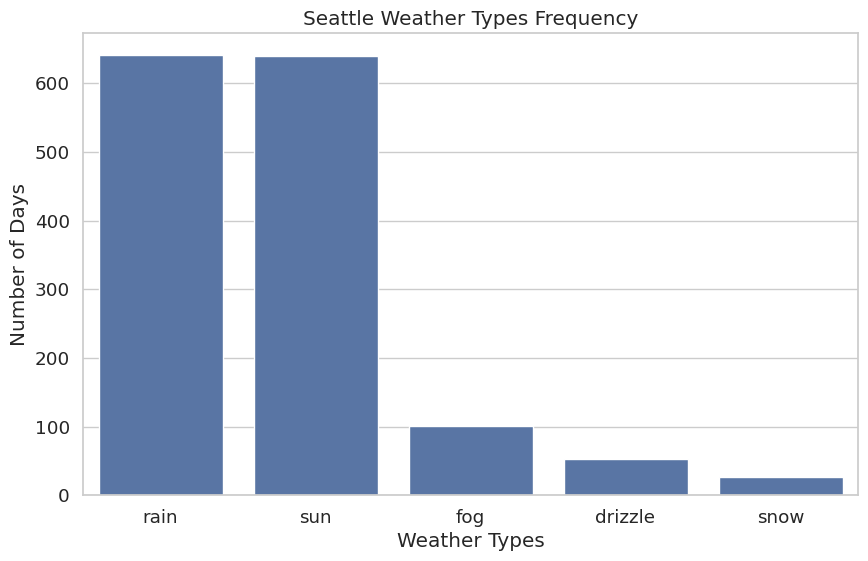

In [15]:
url = "https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv"
data = pd.read_csv(url)
print("Fields in the dataset:")
print(data.columns)

# Count the occurrences of each weather type
weather_counts = data["weather"].value_counts()

# Create a bar plot of weather occurrences
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
weather_plot = sns.barplot(x=weather_counts.index, y=weather_counts.values)

# Add labels and title
weather_plot.set(xlabel="Weather Types", ylabel="Number of Days", title="Seattle Weather Types Frequency")
plt.savefig("weather_plot.png")

print("Plot has been saved to 'weather_plot.png'.")

### The final figure

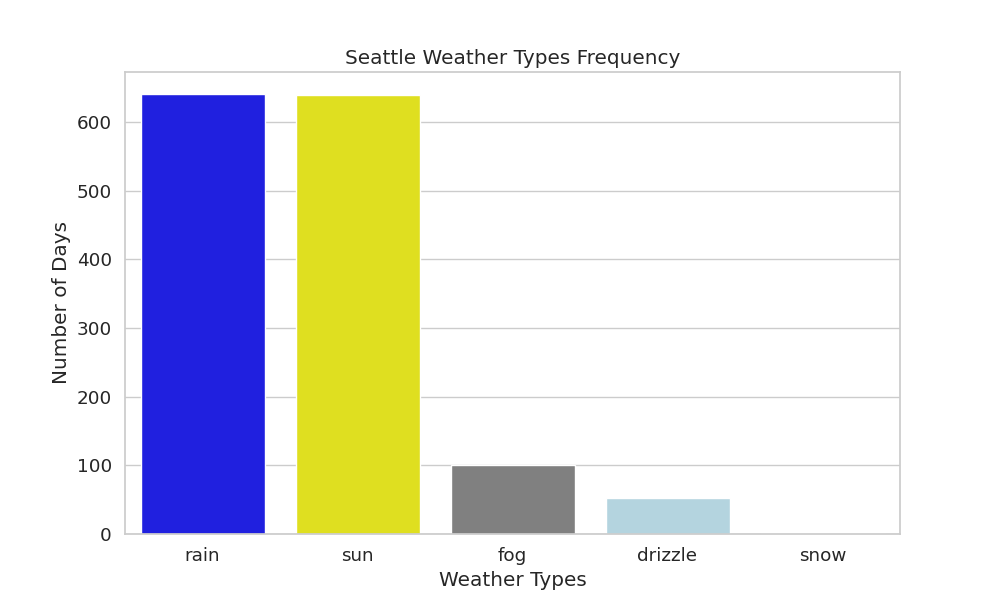

In [ ]:
Image(filename="groupchat/improved_weather_plot.png")